In [1]:
import pandas as pd

from googletrans import Translator

import docx

In [2]:
doc = docx.Document('Описание задания.docx')
print('\n'.join([p.text for p in doc.paragraphs]))

В качестве испытания представлен набор данных Mechanical Data Set. В архиве находятся:
Файл с набором данных.
Файл с записями из набора данных, не включенными в основной набор (обычно - не используются).
Файл с описанием набора данных (английский язык, можно воспользоваться любым удобным переводчиком).
Набор данных описывает результаты контроля состояния электро-механического оборудования (насосов) с применением методов вибрационной диагностики. В качестве выходного параметра рассматривается состояние, характеризующееся либо полной исправностью, либо одной или несколькими неисправностями (подробно – в файле с описанием). Таким образом – решается задача классификации.
Необходимо:
Ознакомиться с описанием набора данных, дать краткую интерпретацию смыслового содержания. Пояснить атрибуты (входные параметры) и возможные классы состояний диагностируемых объектов.
Ознакомиться с файлом с данными, дать краткую характеристику структуре представления данных в нем.
Сформировать (разработать) и к

In [3]:
with open("Mechanical DataSet/mechanical-analysis.names.txt", "r") as file:
    text = list()
    for line in file:
        text.append(line.strip()) #.strip("\n")
text = '\n'.join(text)

translator = Translator()
result = translator.translate(text, dest='ru')

print(result.text)

1. Название базы данных: Механический анализ
-- диагностика неисправностей электромеханических устройств от вибрации
измерения

2. Источники:
(a) Первоначальные владельцы базы данных:

Ф. Бергадано, А. Джордана, Л. Сайтта
Туринский университет, Италия
Corso Svizzera 185, Турин - тел. (39) 11 7712002
электронная почта: bergadan@itoinfo.bitnet

Ф. Бракадори, Д. Де Марчи
Sogesta, Localita' Crocicchio, Урбино, Италия

(б) Донор базы данных: Энихем (Эни), Равенна через Согесту (Эни), Урбино.
с) Дата получения: июнь 1990 года.
3. Использование в прошлом:
а) Ф. Бергадано, А. Джордана, Л. Сайтта, Ф. Бранкадори, Д. Де Марчи:
«Интегрированное обучение в реальной области»
проц. VII Конференция ML, Остин, Техас, 1990 г. (стр. 322-329)
(b) Указание того, какой атрибут(ы) прогнозировался: класс.
(c) Указание результатов исследования: результаты описаны в документе.
4. Соответствующий информационный пункт:
-- Ф. Бергадано предоставил эту базу данных. Каждый экземпляр содержит множество
компонентов, к

In [4]:
# 1 - компоненты
# последнее - экзмепляры

In [5]:
with open("Mechanical DataSet/mechanical-analysis.data.txt", "r") as file:
    file_text = list()
    for line in file:
        file_text.append(line.strip())
file_text
text = list()
for line in file_text:
    if line[0]=='=': number = line.split()[-2][:-1]
    else: text.append(' '.join(line.split() + [number]))
pd.DataFrame(text).to_csv('mechanical-analysis.data.txt', header=None, index=False)
data = pd.read_csv('mechanical-analysis.data.txt', header=None, sep=' ')
data

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,3,0,120.00,21.0,ao,1000,1
1,1,1,1,3,0,55.00,7.5,aa,1000,1
2,1,1,2,3,0,26.00,1.4,vo,1000,1
3,1,1,3,3,0,11.00,0.8,va,1000,1
4,1,1,4,2,0,7.00,5.5,ao,1000,1
...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221
9250,1,6,36,3,30000,0.70,0.0,io,1500,221
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221


In [6]:
# columns_dict = dict()
rslt_txt_splt = result.text.split('\n')
for i in range(len(rslt_txt_splt)):
    if rslt_txt_splt[i][:len('Существует ')] == 'Существует ': 
        break
# data['Class - Short'] = data.iloc[:,1].map({int(el[0]): el[2:] for el in rslt_txt_splt[i+2:i+8]})
# map({1:})
# rslt_txt_splt[i+2:i+8]

In [7]:
classes = result.text.split("\n\n")[-1].split("\n")[:-1]
class_dict = dict()
for cl in classes:
    cl_splt = cl.split()
#     print(cl_splt)
    if ":" in cl:
        if '+' not in cl:
            cls = int(cl_splt[1][:-1])
            class_dict[cls] = list(map(int, cl_splt[2:]))
        else:
            cls = (int(cl_splt[1]), int(cl_splt[4][:-1]))
            class_dict[cls] = list(map(int, cl_splt[5:]))
    else: class_dict[cls].extend(list(map(int, cl_splt)))
        
def classif(number:int):
    for key, value in class_dict.items():
        if number in value: return key

data[10] = data[9].apply(classif)
print("Отсутствие класса:", set(data[data[10].isna()][9]), len(data[data[10].isna()][9]))
data

Отсутствие класса: {72} 74


,0,1,2,3,4,5,6,7,8,9,10
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7
3,1,1,3,3,0,11.00,0.8,va,1000,1,7
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7
...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6


In [8]:
# columns_dict = dict()
rslt_txt_splt = result.text.split('\n')
for i in range(len(rslt_txt_splt)):
    if rslt_txt_splt[i][:len('Затем ')] == 'Затем ': 
        break
rslt_txt_splt[i+3:i+7]

['7 Несоосность вала (включая класс 1 и класс 4)',
 '8 Проблемы в насосе (включает классы 2, 3 и 5)',
 '9 Проблемы в моторе (включает классы 2, 3 и 5)',
 '10 Проблемы в машине (включает в себя все основные классы, кроме класса 6)']

In [9]:
columns_dict = dict()
for line in result.text.split('\n'):
    if line[1:4] == ' - ': 
        print(line)
        columns_dict[int(line[0])] = line[4:].split('(')[0][:-1]
columns_dict

0 - фиктивный (всегда 1) - используется для нумерации - игнорировать
1 - класс - классификация (1..6, то же для компонентов одного примера)
2 - # - номер компонента (целое число)
3 - суп - опора в машине, где производилась замерка (1..4)
4 - cpm - частота измерения (целое число)
5 - неправильная мера (реальная)
6 - миср - более ранняя мера (действительная)
7 - dir - фильтр, тип меры и направление:
8 - омега - обороты машины (целое число,


{0: 'фиктивный',
 1: 'класс - классификация',
 2: '# - номер компонента',
 3: 'суп - опора в машине, где производилась замерка',
 4: 'cpm - частота измерения',
 5: 'неправильная мера',
 6: 'миср - более ранняя мера',
 7: 'dir - фильтр, тип меры и направление',
 8: 'омега - обороты машины'}

In [10]:
# data = data.rename(columns=columns_dict|{9:'Instance number', 10:'Instance class'})
# data

In [11]:
data[data.iloc[:,1]==6].iloc[:,-1].value_counts()

6    875
1     61
2     31
Name: 10, dtype: int64

In [12]:
data[data.iloc[:,-1]==6].iloc[:,1].value_counts()

6    875
1     26
Name: 1, dtype: int64

Набор данных описывает результаты контроля состояния электро-механического оборудования (насосов) с применением методов вибрационной диагностики. В качестве выходного параметра рассматривается состояние, характеризующееся либо полной исправностью, либо одной или несколькими неисправностями (подробно – в файле с описанием). Таким образом – решается задача классификации.

In [13]:
data_rename = data.rename(columns=columns_dict|{9:'Instance number', 10:'Instance class'})

In [14]:
# data.rename(columns=columns_dict|{9:'Instance number', 10:'Instance class'}).info()

In [15]:
data_rename.nunique()

фиктивный                                            1
класс - классификация                                6
# - номер компонента                                81
суп - опора в машине, где производилась замерка      5
cpm - частота измерения                             88
неправильная мера                                  278
миср - более ранняя мера                           122
dir - фильтр, тип меры и направление                10
омега - обороты машины                               3
Instance number                                    209
Instance class                                      21
dtype: int64

In [16]:
data_rename

,фиктивный,класс - классификация,# - номер компонента,"суп - опора в машине, где производилась замерка",cpm - частота измерения,неправильная мера,миср - более ранняя мера,"dir - фильтр, тип меры и направление",омега - обороты машины,Instance number,Instance class
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7
3,1,1,3,3,0,11.00,0.8,va,1000,1,7
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7
...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6


In [17]:
for col in data_rename.columns:
    print("Column: ", col)
    print(data_rename[col].value_counts())
    print()

Column:  фиктивный
1    9254
Name: фиктивный, dtype: int64

Column:  класс - классификация
2    3194
1    2931
6     967
4     773
3     720
5     669
Name: класс - классификация, dtype: int64

Column:  # - номер компонента
0     209
7     209
12    209
11    209
1     209
     ... 
76      3
77      2
78      1
79      1
80      1
Name: # - номер компонента, Length: 81, dtype: int64

Column:  суп - опора в машине, где производилась замерка
2    2729
3    2668
4    2093
1    1763
0       1
Name: суп - опора в машине, где производилась замерка, dtype: int64

Column:  cpm - частота измерения
0        3588
3000     1147
6000      853
9000      502
1500      385
         ... 
39000       1
43000       1
15500       1
60000       1
9200        1
Name: cpm - частота измерения, Length: 88, dtype: int64

Column:  неправильная мера
0.90      309
0.50      277
0.60      260
0.70      257
4.50      225
         ... 
502.50      1
704.00      1
8.75        1
3.95        1
554.00      1
Name: непра

In [18]:
for col in data_rename.columns:
    print(col)
    print(data_rename[col].unique())
    print()

фиктивный
[1]

класс - классификация
[1 4 5 2 3 6]

# - номер компонента
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]

суп - опора в машине, где производилась замерка
[3 2 1 4 0]

cpm - частота измерения
[    0  6000 18000 20000 22000 23000  2000  4000  3000 24000  1000  9000
  1500 31000  4500  7500 33000 29000 10500  4800 13000 30000  7000  8000
 12000 11000 12500 15000 32000 21000 41000 38000 48000 28000 37000 36000
 27000 42000 19000 35000 34000 40000 46000  6100  9100  6050 25000 26000
 61000 62000 60000 16000 15500 13500 17000 49000 50000 45000 44000 43000
  8500 39000 11500  6500 19500  6600 75000 74000 77000     7 14000  5000
 78000 79000 51000 90000 85000 10000  2100 21500 47000  6300  5100  8200
  5200  1800  3600  9200]

неправильная мера
[1.200e+02 5.500e+01 2.600e+01 1.100e

В качестве испытания представлен набор данных Mechanical Data Set. В архиве находятся:
Файл с набором данных.
Файл с записями из набора данных, не включенными в основной набор (обычно - не используются).
Файл с описанием набора данных (английский язык, можно воспользоваться любым удобным переводчиком).

Набор данных описывает результаты контроля состояния электро-механического оборудования (насосов) с применением методов вибрационной диагностики. В качестве выходного параметра рассматривается состояние, характеризующееся либо полной исправностью, либо одной или несколькими неисправностями (подробно – в файле с описанием). Таким образом – решается задача классификации.

7. Атрибуты:

0 - фиктивный (всегда 1) - используется для нумерации - игнорировать

1 - класс - классификация (1..6, то же для компонентов одного примера)

2 - # - номер компонента (целое число)

3 - суп - опора в машине, где производилась замерка (1..4)

4 - cpm - частота измерения (целое число)

5 - неправильная мера (реальная)

6 - миср - более ранняя мера (действительная)

7 - dir - фильтр, тип меры и направление:
{vo=<без фильтра, скорость, горизонталь>,
va=<без фильтра, скорость, осевой>,
vv=<без фильтра, скорость, вертикаль>,
ao=<без фильтра, амплитуда, горизонталь>,
aa=<без фильтра, амплитуда, аксиальный>,
av=<без фильтра, амплитуда, вертикаль>,
io=<фильтр, скорость, горизонталь>,
ia=<фильтр, скорость, осевой>,
iv=<фильтр, скорость, вертикаль>}

8 - омега - обороты машины (целое число,
то же самое для компонентов одного примера)

In [19]:
data[data.iloc[:,1]==6]

,0,1,2,3,4,5,6,7,8,9,10
8287,1,6,0,1,0,3.50,0.0,ao,1000,191,6
8288,1,6,1,1,0,2.50,0.0,av,1000,191,6
8289,1,6,2,1,0,1.30,0.0,vo,1000,191,6
8290,1,6,3,1,0,0.60,0.0,vv,1000,191,6
8291,1,6,4,3,0,21.00,0.0,ao,1000,191,6
...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6


In [20]:
# for i in range(11):
#     data[f'cat_{i}'] = data[i].apply(str)
# data.sample(5)

In [21]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7
3,1,1,3,3,0,11.00,0.8,va,1000,1,7
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7
...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
import random
import time
import copy
import string

In [23]:
from sklearn import metrics
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from sklearn.model_selection._search_successive_halving import HalvingGridSearchCV, HalvingRandomSearchCV

In [24]:
data.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10
0,1,0,3,0,120.00,21.0,ao,1000,1,7
1,1,1,3,0,55.00,7.5,aa,1000,1,7
2,1,2,3,0,26.00,1.4,vo,1000,1,7
3,1,3,3,0,11.00,0.8,va,1000,1,7
4,1,4,2,0,7.00,5.5,ao,1000,1,7
...,...,...,...,...,...,...,...,...,...,...
9249,6,35,3,27000,0.65,0.0,io,1500,221,6
9250,6,36,3,30000,0.70,0.0,io,1500,221,6
9251,6,37,3,32000,0.60,0.0,iv,1500,221,6
9252,6,38,4,1500,0.60,0.0,iv,1500,221,6


In [25]:
rnd = 71
n_cmp = 7

In [26]:
# X

In [27]:
set(data[7])

{'aa', 'ao', 'av', 'ia', 'io', 'iv', 'ma', 'va', 'vo', 'vv'}

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['label_code_7'] = labelencoder.fit_transform(data[7].values)
data

,0,1,2,3,4,5,6,7,8,9,10,label_code_7
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7,1
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7,0
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7,8
3,1,1,3,3,0,11.00,0.8,va,1000,1,7,7
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6,4
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6,4
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6,5
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6,5


In [29]:
data_ = data.drop([7], axis=1)
data_

,0,1,2,3,4,5,6,8,9,10,label_code_7
0,1,1,0,3,0,120.00,21.0,1000,1,7,1
1,1,1,1,3,0,55.00,7.5,1000,1,7,0
2,1,1,2,3,0,26.00,1.4,1000,1,7,8
3,1,1,3,3,0,11.00,0.8,1000,1,7,7
4,1,1,4,2,0,7.00,5.5,1000,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,1500,221,6,4
9250,1,6,36,3,30000,0.70,0.0,1500,221,6,4
9251,1,6,37,3,32000,0.60,0.0,1500,221,6,5
9252,1,6,38,4,1500,0.60,0.0,1500,221,6,5


In [30]:
X = data_.iloc[:,2:].drop([9, 10], axis=1)
y = data_.iloc[:,10]

In [31]:
X

,2,3,4,5,6,8,label_code_7
0,0,3,0,120.00,21.0,1000,1
1,1,3,0,55.00,7.5,1000,0
2,2,3,0,26.00,1.4,1000,8
3,3,3,0,11.00,0.8,1000,7
4,4,2,0,7.00,5.5,1000,1
...,...,...,...,...,...,...,...
9249,35,3,27000,0.65,0.0,1500,4
9250,36,3,30000,0.70,0.0,1500,4
9251,37,3,32000,0.60,0.0,1500,5
9252,38,4,1500,0.60,0.0,1500,5


In [32]:
y

0       1
1       0
2       8
3       7
4       1
       ..
9249    4
9250    4
9251    5
9252    5
9253    6
Name: label_code_7, Length: 9254, dtype: int32

In [33]:
# https://habr.com/ru/company/newprolab/blog/350584/
# https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B2%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%D1%81_t-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC
# https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python
# https://www.askpython.com/python/examples/principal-component-analysis

In [34]:
X_ch, _, _, _ = train_test_split(X, y, test_size=0.85, random_state=rnd)
pca = KernelPCA(n_components=n_cmp, random_state=rnd, kernel="cosine", n_jobs=-1)
pca.fit(X_ch)
X2 = pca.transform(X)

C:\Users\Ольга\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Ольга\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
X

,2,3,4,5,6,8,label_code_7
0,0,3,0,120.00,21.0,1000,1
1,1,3,0,55.00,7.5,1000,0
2,2,3,0,26.00,1.4,1000,8
3,3,3,0,11.00,0.8,1000,7
4,4,2,0,7.00,5.5,1000,1
...,...,...,...,...,...,...,...
9249,35,3,27000,0.65,0.0,1500,4
9250,36,3,30000,0.70,0.0,1500,4
9251,37,3,32000,0.60,0.0,1500,5
9252,38,4,1500,0.60,0.0,1500,5


In [36]:
X2

array([[-6.66305762e-01, -4.31970670e-02,  1.14369363e-01, ...,
        -6.52131761e-04,  1.88579340e-02,  4.20396914e-04],
       [-6.69752035e-01, -3.83202268e-02,  5.00601513e-02, ...,
        -1.21877341e-03,  6.23209917e-03, -1.19824420e-03],
       [-6.70392944e-01, -3.72211755e-02,  2.07277291e-02, ...,
         6.54292709e-03,  2.23486943e-03, -1.41006206e-03],
       ...,
       [ 7.06838858e-01, -1.32716567e-01, -2.44737355e-04, ...,
        -1.03270235e-04, -5.38230852e-05,  3.45457568e-05],
       [ 6.06800093e-02,  1.89354862e-01, -8.68956502e-04, ...,
        -4.44648374e-04, -2.44243797e-04, -3.30585578e-04],
       [ 7.04734358e-01, -1.30413471e-01, -2.28747778e-04, ...,
        -7.99149960e-05, -5.30710334e-05,  7.35825946e-05]])

In [37]:
# http://distrland.blogspot.com/2020/10/12-python.html
# Полное руководство по 12 техникам уменьшения размерности (с кодом Python)

C:\Users\Ольга\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


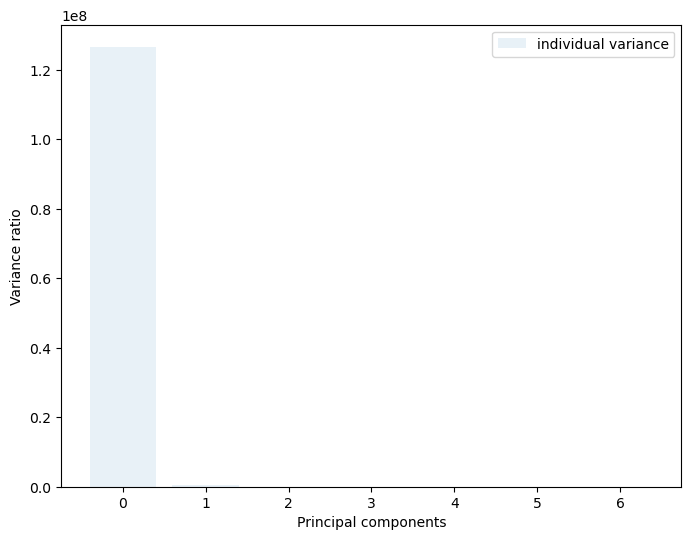

In [38]:
pca = PCA()
pca.fit_transform(X)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(len(pca_variance)), pca_variance, alpha=0.1, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [39]:
X

,2,3,4,5,6,8,label_code_7
0,0,3,0,120.00,21.0,1000,1
1,1,3,0,55.00,7.5,1000,0
2,2,3,0,26.00,1.4,1000,8
3,3,3,0,11.00,0.8,1000,7
4,4,2,0,7.00,5.5,1000,1
...,...,...,...,...,...,...,...
9249,35,3,27000,0.65,0.0,1500,4
9250,36,3,30000,0.70,0.0,1500,4
9251,37,3,32000,0.60,0.0,1500,5
9252,38,4,1500,0.60,0.0,1500,5


In [40]:
set(X[8])

{1000, 1500, 3000}

In [41]:
pca.explained_variance_ratio_

array([9.95717768e-01, 4.27660660e-03, 3.90355149e-06, 1.45000360e-06,
       2.23194723e-07, 4.03033265e-08, 8.26403265e-09])

C:\Users\Ольга\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Cumulative explained variance')

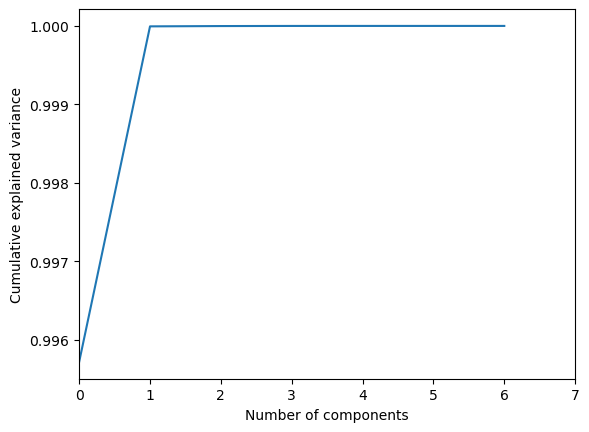

In [42]:
from sklearn.decomposition import PCA
pca = PCA().fit(X) #.drop([8], axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [43]:
pca_variance.argsort?? #()

SyntaxError: invalid syntax (2635478510.py, line 1)

In [ ]:
plt.bar(range(len(pca_variance)), pca_variance, alpha=0.5, align='center', label='individual variance')

In [ ]:
pca_variance

In [ ]:
X2.shape

In [ ]:
result.text.split('\n')

In [ ]:
data